# German Credit Risk

In [1]:
# import library 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
sns.set()
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# load data 
data = pd.read_csv('Data/german_credit.csv')

In [3]:
# dimensi data
data.shape

(1000, 10)

Data kita memiliki 1000 baris dan 10 kolom.

In [4]:
# lima data teratas 
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


Columns Description :
    
1. Age (numeric)
2. Sex (text: male, female)
3. Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
4. Housing (text: own, rent, or free)
5. Saving accounts (text - little, moderate, quite rich, rich)
6. Checking account (text - little, moderate, quite rich, rich)
7. Credit amount (numeric, in DM)
8. Duration (numeric, in month)
9. Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

In [5]:
# lima data terbawah 
data.tail()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV
999,999,27,male,2,own,moderate,moderate,4576,45,car


In [6]:
# variabel/kolom pada data 
data.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [7]:
# tipe data 
data.dtypes

Unnamed: 0           int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

Dapat dilihat bahwa semua tipe data sesuai dengan variabel yang ada.

In [8]:
# informasi lengkap dari data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


## Cleaning Data 

### Handle Missing Values

In [9]:
# mengetahui variabel yg mengalami missing values 
count_missing = data.isna().sum()
jml = count_missing>0
print('Jumblah variabel yang missing :', jml.sum())
count_missing

Jumblah variabel yang missing : 2


Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [10]:
# menghitung persentase variabel yang mangalami missing values
percentage = round(count_missing/len(data)*100,2)
percentage

Unnamed: 0           0.0
Age                  0.0
Sex                  0.0
Job                  0.0
Housing              0.0
Saving accounts     18.3
Checking account    39.4
Credit amount        0.0
Duration             0.0
Purpose              0.0
dtype: float64

Dapat dilihat bahwa terdapat 2 variabel yang mengalami missing values yaitu : 'Checking account' dan 'Saving accounts' yang bertipe data kategorik yang akan diisi dengan modus dari masing-masing variabel tersebut. Dan tidak ada variabel yang mengalami missing values >=50% jadi tidak ada yang perlu didrop.

In [11]:
# drop variabel yang tidak digunakan 
data.drop(columns='Unnamed: 0', inplace=True)

In [12]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [13]:
data.shape

(1000, 9)

In [14]:
# fill missing values pada variabel kategorik 
features = ['Saving accounts','Checking account']

for i in features:
    if i in data.columns.values:
        data[i].fillna(data[i].value_counts().index[0], inplace=True)

In [15]:
data.isna().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

Data kita telah clean dari missing values

In [16]:
# statistik deksriptif 
data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [17]:
data.describe(include='O')

,Sex,Housing,Saving accounts,Checking account,Purpose
count,1000,1000,1000,1000,1000
unique,2,3,4,3,8
top,male,own,little,little,car
freq,690,713,786,668,337


## Exploratory Data Analysis 

### Univariate Analysis

In [18]:
data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [19]:
data.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

#### Distribusi Age, Credit amount dan Duration

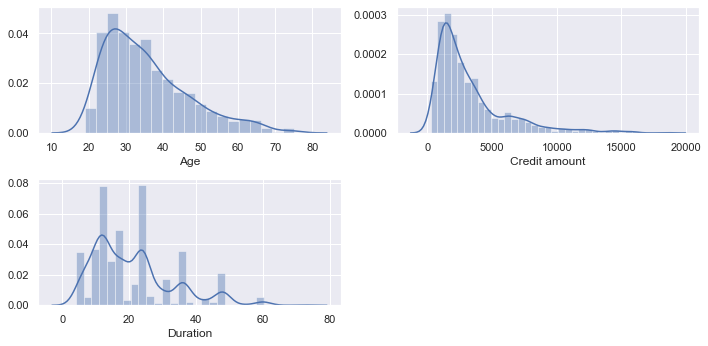

In [20]:
features = ['Age','Credit amount','Duration']

a = plt.figure(figsize=(10,5))
for i, j in enumerate(features):
    a.add_subplot(2,2,i+1)
    sns.distplot(data[j])
    a.tight_layout()

* Untuk Age frekuensi terbanyak berada pada rentang nilai ± 21 - 40 (Right Skew). Dari sini kita bisa mengetahui bahwa kisaran umur ± 21 - 40 tahun yang paling banyak mengambil kredit.
* Untuk Credit amount frekuensi terbanyak berada pada rentang nilai ± 1000 - 5000 (Right Skew).
* Untuk Duration frekuensi terbanyak berada pada rentang nilai ± 5 - 22 (Right Skew).

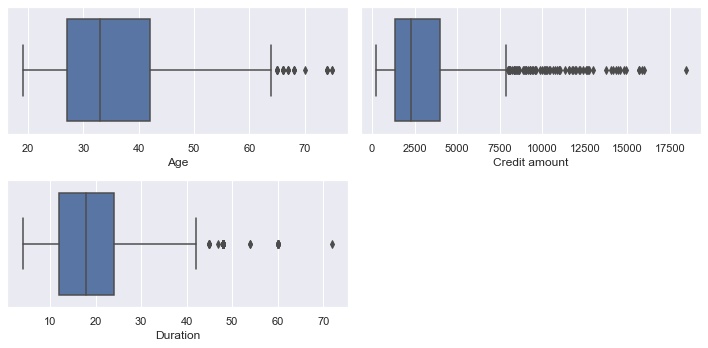

In [21]:
features = ['Age','Credit amount','Duration']

a = plt.figure(figsize=(10,5))
for i, j in enumerate(features):
    a.add_subplot(2,2,i+1)
    sns.boxplot(data[j])
    a.tight_layout()

* Credit amount memiliki outlier yang banyak. Sementara Age dan Duration memiliki outlier yang sedikit.

#### Distribusi Sex, Job, Housing, Saving accounts dan Checking account

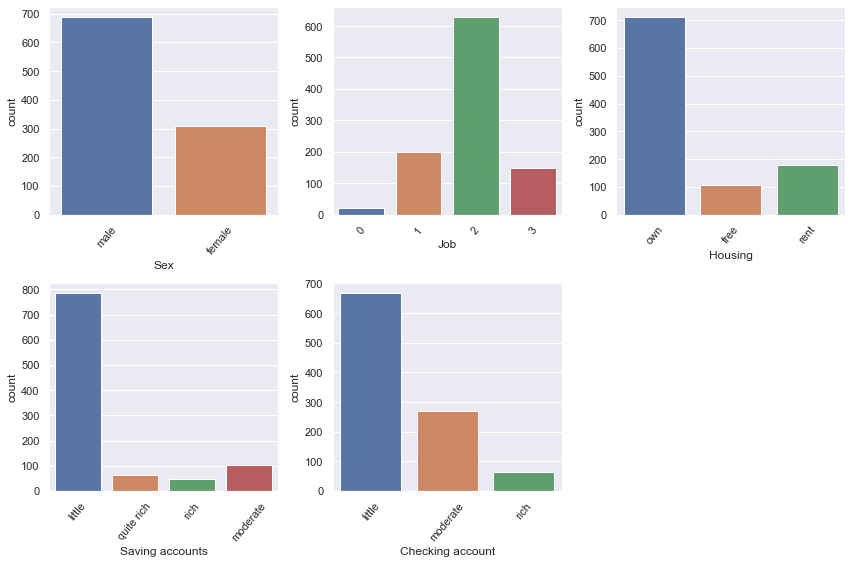

In [22]:
features = ['Sex','Job','Housing','Saving accounts','Checking account']

b = plt.figure(figsize=(12,8))
for i, j in enumerate(features):
    b.add_subplot(2,3,i+1)
    plot = sns.countplot(data[j])
    plt.setp(plot.get_xticklabels(), rotation=50)
    b.tight_layout()

* Untuk Sex laki-laki mendominasi dibandingkan dengan perempuan. Ini mengartikan bahwa mayoritas peminjam adalah laki-laki mungkin karena laki-laki adalah kepala keluarga.
* Untuk Job kategori 2(skilled) sangat mendominasi dibandingkan yang lainnya. Sementara 0(unskilled and non resident) jumblahnya sangat sedikit. 
* Untuk Housing own sangat mendominasi dibandingkan yang lainnya.
* Dapat disimpulkan bahwa orang-orang dengan Job kategori skilled dan Housing kategori own merupakan orang-orang yang banyak diberikan kredit oleh bank. Mungkin karena bank percaya bahwa orang-orang seperti itu dapat mengembalikan uang mereka.
* Untuk Saving accounts little mendominasi. Ini mengartikan bahwa peminjam mayoritas memiliki Saving accounts yang kecil.
* Untuk Checking account sama halnya seperti Saving account, little mendominasi. Ini mengartikan bahwa bahwa mayoritas peminjam memiliki Checking account yang kecil.

#### DIstribusi Purpose

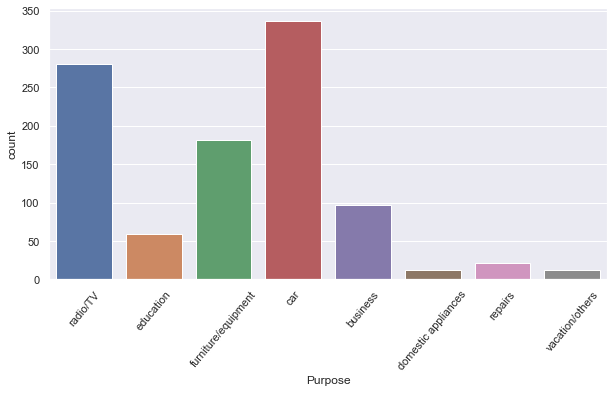

In [23]:
plt.figure(figsize=(10,5))
plot = sns.countplot(data['Purpose'])
plt.setp(plot.get_xticklabels(), rotation=50)
plt.show()

* Ternyata ada dua hal yang mendominasi maksud peminjaman yaitu : radio/TV dan mobil. Ini mengartikan bahwa pinjaman banyak digunakan untuk kebutuhan tersier.

#### Distribusi Duration

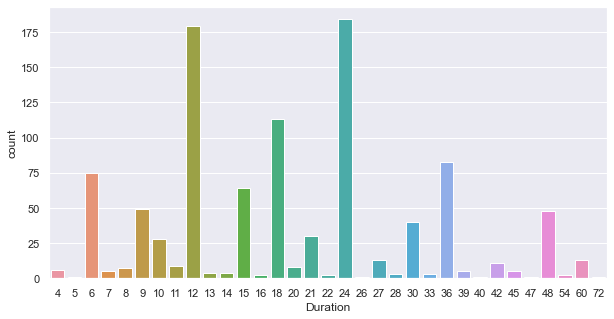

In [24]:
plt.figure(figsize=(10,5))
plot = sns.countplot(data['Duration'])
plt.show()

* Durasi peminjaman terbanyak adalah 24 dan 12 bulan. Ini mengartikan bahwa mayoritas orang memilih melunasi kredit dalam jangka 24 dan 12 bulan.

### Bivariate Analysis

#### Korelasi

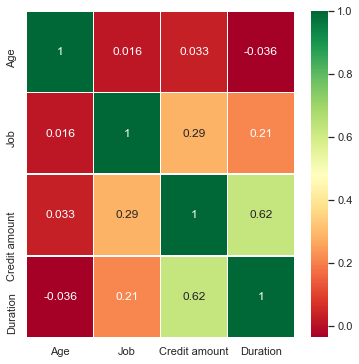

In [25]:
plt.figure(figsize=(6,6))
sns.heatmap(data.corr(), annot=True, linewidths=0.5, cmap='RdYlGn')
plt.show()

* Duration dengan Credit amount yang memiliki korelasi positif kuat sebesar 0.62.
* Job dengan Duration dan Credit amount memiliki korelasi positif lemah sebesar 0.21 dan 0.29.

#### Hubungan Duration dengan Credit amount

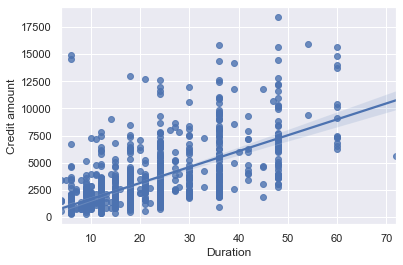

In [26]:
sns.regplot(x='Duration', y='Credit amount', data=data)
plt.show()

* Dari visualisasi di atas dapat disimpulkan bahwa semakin lama Duration maka semakin besar Credit amount yang diambil.

#### Hubungan Sex dengan Credit amount dan Duration

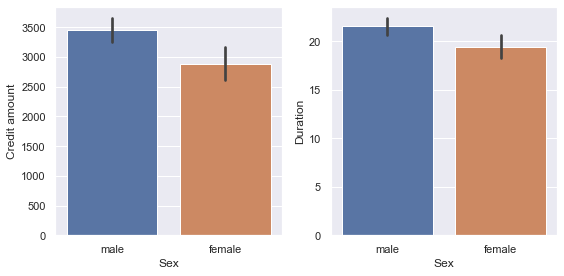

In [27]:
features = ['Credit amount','Duration']

c = plt.figure(figsize=(8,4))
for i, j in enumerate(features):
    c.add_subplot(1,2,i+1)
    sns.barplot(x=data['Sex'], y=data[j])
    c.tight_layout()

* Laki-laki memiliki rata-rata Credit amount lebih besar dari perempuan walaupun perbedaannya tidak begitu jauh.
* Laki-laki memiliki rata-rata Durasi melunasi kredit lebih lama dari perempuan walaupun perbedaannya tidak begitu jauh.
* Sepertinya laki-laki mendominasi baik dari Credit amount ataupun Duration. Sehingga dapat dikatakan bahwa laki-laki lebih berani mengambil Credit amount lebih besar dengan durasi pelunasan yang lebih lama dibandingkan perempuan.

#### Hubungan Job dengan Credit amount dan Duration

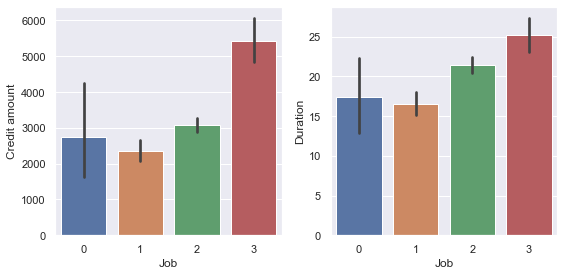

In [28]:
features = ['Credit amount','Duration']

d = plt.figure(figsize=(8,4))
for i, j in enumerate(features):
    d.add_subplot(1,2,i+1)
    sns.barplot(x=data['Job'], y=data[j])
    d.tight_layout()

* Untuk Job kategori 3(high skill) memiliki rata-rata Credit amount yang lebih besar dengan perbedaan yang cukup jauh dengan yang lainnya.
* Untuk Job kategori 3(high skill) memiliki rata-rata Duration yang lebih besar walaupun perbedaan dengan yang lainnya tidak begitu jauh.
* Jadi dapat disimpulkan bahwa semakin high skill orang tersebut maka, semakin berani mengambil Credit amount yang besar dengan durasi pelunasan yang lebih lama.

#### Hubungan Saving accounts, Checking account, Job dengan Credit amount

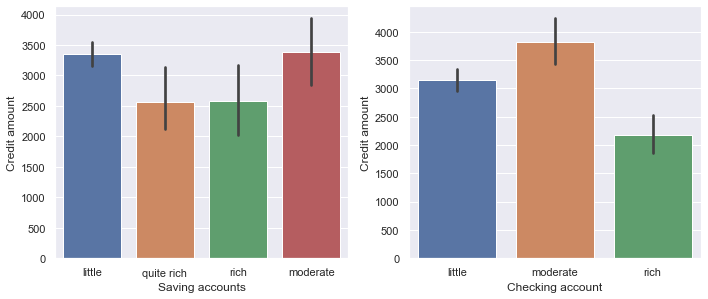

In [29]:
features = ['Saving accounts','Checking account']

f = plt.figure(figsize=(10,8))
for i, j in enumerate(features):
    f.add_subplot(2,2,i+1)
    sns.barplot(x=data[j], y=data['Credit amount'])
    f.tight_layout()

* Untuk Saving accounts moderate dan little memiliki rata-rata Credit amount yang lebih besar walaupun diantara keduanya memiliki perbedaaan rata-rata yang sangat kecil.
* Untuk Checking account moderate memiliki rata-rata lebih besar diantara yang lainnya.

#### Hubungan Age dengan Credit amount

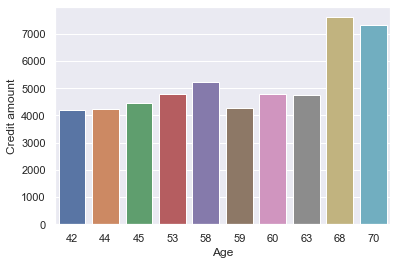

In [30]:
# 10 besar umur dengan rata-rata credit amount tertinggi
umur = data.groupby('Age')['Credit amount'].mean().sort_values(ascending=False).reset_index().head(10)
sns.barplot(x='Age', y='Credit amount', data=umur)
plt.show()

* Umur 68 dan 70 tahun memiliki rata-rata Credit amount tertinggi dengan perbedaan diantara keduanya yang sangat kecil.